In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv3D, Flatten,MaxPooling3D,AveragePooling3D, concatenate,Input ,SpatialDropout3D,Dropout
import keras
from math import e
from sklearn.model_selection import train_test_split
from keras.models import Model
from sklearn.preprocessing import StandardScaler
from joblib import dump, load
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform
from sklearn.model_selection import KFold
import statistics as st
from keras.utils.vis_utils import plot_model
#import visualkeras
from joblib import dump, load

In [4]:
fogData = xr.open_dataset('../../../Data/FogData/CombinedFogData_25Stations.nc')
#plt.figure(figsize=[16,8])
fogData
StackFog=fogData.fogdata.stack(a=('years','months','days'))
StackFog
dd =[];
for i in range(StackFog.years.values.shape[0]):
    dd=dd+[str(StackFog.years[i].values)+'-'+str(StackFog.months[i].values)+"-"+str(StackFog.days[i].values)]
fg = xr.Dataset({'fogdata': (('time','stations'), StackFog.values.T)}, coords={'time': pd.to_datetime(dd),'stations': fogData.stations})

In [14]:
DFog=fg.sel(stations=42182)
#DFog.time
print(DFog.sel(time=slice('2018-12-1','2019-1-31')).values)

<bound method Mapping.values of <xarray.Dataset>
Dimensions:   (time: 62)
Coordinates:
  * time      (time) datetime64[ns] 2018-12-01 2018-12-02 ... 2019-01-31
    stations  int32 42182
Data variables:
    fogdata   (time) float64 0.0 0.0 0.0 0.0 0.0 0.0 ... 0.0 1.0 0.0 0.0 0.0 0.0>


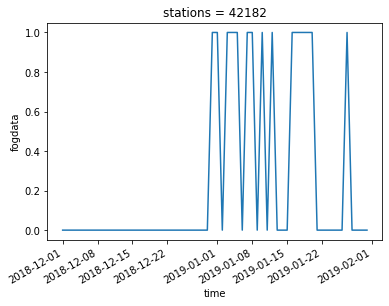

In [16]:
DFog.sel(time=slice('2018-12-1','2019-1-31')).fogdata.plot()


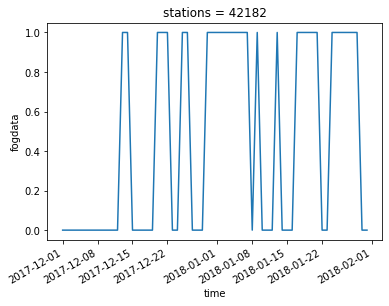

In [24]:
DFog.sel(time=slice('2017-12-1','2018-1-31')).fogdata.plot()

In [29]:
print(DFog.sel(time=slice('2018-12-1','2019-1-31')).fogdata[DFog.sel(time=slice('2018-12-1','2019-1-31')).fogdata==1.0].count())
print(DFog.sel(time=slice('2017-12-1','2018-1-31')).fogdata[DFog.sel(time=slice('2017-12-1','2018-1-31')).fogdata==1.0].count())
print(DFog.sel(time=slice('2003-12-1','2004-1-31')).fogdata[DFog.sel(time=slice('2003-12-1','2004-1-31')).fogdata==1.0].count())
print(DFog.sel(time=slice('2002-12-1','2003-1-31')).fogdata[DFog.sel(time=slice('2002-12-1','2003-1-31')).fogdata==1.0].count())


<xarray.DataArray 'fogdata' ()>
array(15)
Coordinates:
    stations  int32 42182
<xarray.DataArray 'fogdata' ()>
array(29)
Coordinates:
    stations  int32 42182
<xarray.DataArray 'fogdata' ()>
array(39)
Coordinates:
    stations  int32 42182
<xarray.DataArray 'fogdata' ()>
array(33)
Coordinates:
    stations  int32 42182


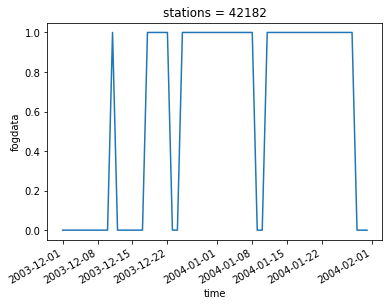

In [31]:
DFog.sel(time=slice('2003-12-1','2004-1-31')).fogdata.plot()

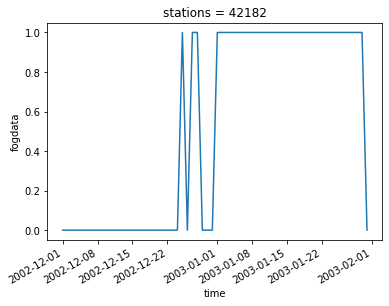

In [32]:
DFog.sel(time=slice('2002-12-1','2003-1-31')).fogdata.plot()